Name: **Zhenmin Hua**  
USC_ID: **5905057247**  
Github username: **Zeddhua2077**

# 552_hw7

In [87]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, hamming_loss, calinski_harabasz_score, silhouette_score
import warnings
warnings.filterwarnings('ignore')

## Multi-class and Multi-Label Classification Using Support Vector Machines

### (a) download

In [2]:
df = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [3]:
df.pop('RecordID')
all_x = df.iloc[:,:-3]
all_y = df.iloc[:,-3:]
x_train, x_test, y_train, y_test = train_test_split(all_x, all_y, train_size=0.7, random_state=30)

### (b) 

#### (i) research exact match/hamming loss

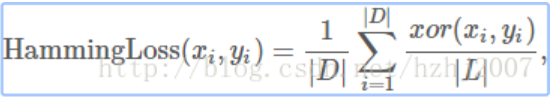
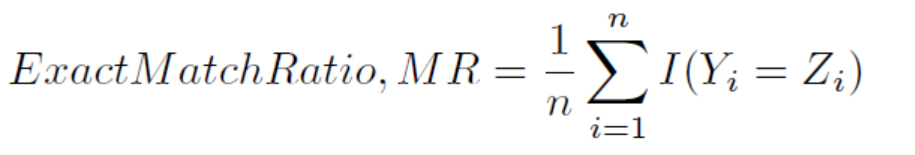

In [160]:
def exact_match(y_true, y_pred):
    match = 0
    for i in range(len(y_true)):
        if str(y_true[i]) == str(y_pred[i]):
            match += 1
    return match / len(y_true)
    
def hamming_loss_new(y_true, y_pred):
    hamm = 0
    for i in range(len(y_true)):
        tmp = 0
        for j in range(len(y_true[i])):
            if y_pred[i][j] != y_true[i][j]:
                tmp += 1
        hamm += tmp
    return hamm / (len(y_true) * 3) 

#### (ii) SVM

In [ ]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# model 1
y_train_1 = y_train['Family']
y_test_1 = y_test['Family']
# grid search for best C and gamma
grid_1 = GridSearchCV(svm.SVC(), param_grid={'C':[0.01, 0.1, 1, 10], 'gamma': [10, 1, 0.1, 0.01]}, cv=10)
grid_1.fit(x_train, y_train_1)
# model
model_1 = svm.SVC(kernel='rbf', decision_function_shape='ovr', C=grid_1.best_params_['C'], gamma=grid_1.best_params_['gamma'], random_state=30)
model_1.fit(x_train, y_train_1)
# predict
y_pred_1 = model_1.predict(x_test)

# model 2
y_train_2 = y_train['Genus']
y_test_2 = y_test['Genus']
# grid search for best C and gamma
grid_2 = GridSearchCV(svm.SVC(), param_grid={'C':[0.01, 0.1, 1, 10], 'gamma': [10, 1, 0.1, 0.01]}, cv=10)
grid_2.fit(x_train, y_train_2)
# model
model_2 = svm.SVC(kernel='rbf', decision_function_shape='ovr', C=grid_2.best_params_['C'], gamma=grid_2.best_params_['gamma'], random_state=30)
model_2.fit(x_train, y_train_2)
# predict
y_pred_2 = model_2.predict(x_test)

# model 3
y_train_3 = y_train['Species']
y_test_3 = y_test['Species']
# grid search for best C and gamma
grid_3 = GridSearchCV(svm.SVC(), param_grid={'C':[0.01, 0.1, 1, 10], 'gamma': [10, 1, 0.1, 0.01]}, cv=10)
grid_3.fit(x_train, y_train_3)
# model
model_3 = svm.SVC(kernel='rbf', decision_function_shape='ovr', C=grid_3.best_params_['C'], gamma=grid_3.best_params_['gamma'], random_state=30)
model_3.fit(x_train, y_train_3)
# predict
y_pred_3 = model_3.predict(x_test)

# model evaluation
y_test_merge = np.hstack((y_test.Family.values.reshape(-1,1), y_test.Genus.values.reshape(-1,1), y_test.Species.values.reshape(-1,1)))
y_pred_merge = np.hstack((y_pred_1.reshape(-1,1), y_pred_2.reshape(-1,1), y_pred_3.reshape(-1,1)))  
print('Exact_Match:', exact_match(y_test_merge, y_pred_merge))
print('Hamming_Loss:', hamming_loss_new(y_test_merge, y_pred_merge))

**output from colab**  
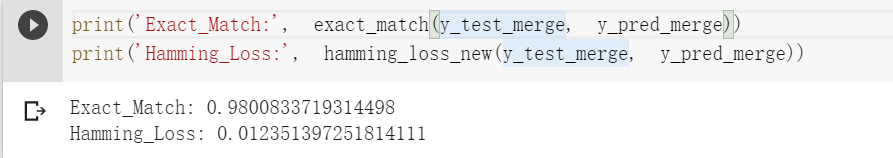

#### (iii) L1-penalized SVM

In [ ]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# model 1
y_train_1 = y_train['Family']
y_test_1 = y_test['Family']
# grid search for best C
grid_1 = GridSearchCV(svm.LinearSVC(penalty='l1', dual=False), param_grid={'C':[0.01, 0.1, 1, 10]}, cv=10)
grid_1.fit(x_train, y_train_1)
# model
model_1 = svm.LinearSVC(penalty='l1', C=grid_1.best_params_['C'], dual=False, random_state=30)
model_1.fit(x_train, y_train_1)
# predict
y_pred_1 = model_1.predict(x_test)

# model 2
y_train_2 = y_train['Genus']
y_test_2 = y_test['Genus']
# grid search for best C
grid_2 = GridSearchCV(svm.LinearSVC(penalty='l1', dual=False), param_grid={'C':[0.01, 0.1, 1, 10]}, cv=10)
grid_2.fit(x_train, y_train_2)
# model
model_2 = svm.LinearSVC(penalty='l1', C=grid_2.best_params_['C'], dual=False, random_state=30)
model_2.fit(x_train, y_train_2)
# predict
y_pred_2 = model_2.predict(x_test)

# model 3
y_train_3 = y_train['Species']
y_test_3 = y_test['Species']
# grid search for best C
grid_3 = GridSearchCV(svm.LinearSVC(penalty='l1', dual=False), param_grid={'C':[0.01, 0.1, 1, 10]}, cv=10)
grid_3.fit(x_train, y_train_3)
# model
model_3 = svm.LinearSVC(penalty='l1', C=grid_3.best_params_['C'], dual=False, random_state=30)
model_3.fit(x_train, y_train_3)
# predict
y_pred_3 = model_3.predict(x_test)

# model evaluation
y_test_merge = np.hstack((y_test.Family.values.reshape(-1,1), y_test.Genus.values.reshape(-1,1), y_test.Species.values.reshape(-1,1)))
y_pred_merge = np.hstack((y_pred_1.reshape(-1,1), y_pred_2.reshape(-1,1), y_pred_3.reshape(-1,1)))  
print('Exact_Match:', exact_match(y_test_merge, y_pred_merge))
print('Hamming_Loss:', hamming_loss_new(y_test_merge, y_pred_merge))

**output from colab**  
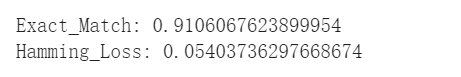

#### (iv) SMOTE / class_weight='balanced'

In [ ]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# model 1
x_train_1, y_train_1 = SMOTE().fit_resample(x_train, y_train['Family'])
y_test_1 = y_test['Family']
# grid search for best C
grid_1 = GridSearchCV(svm.LinearSVC(penalty='l1', dual=False), param_grid={'C':[0.01, 0.1, 1, 10]}, cv=10)
grid_1.fit(x_train_1, y_train_1)
# model
model_1 = svm.LinearSVC(penalty='l1', C=grid_1.best_params_['C'], dual=False, random_state=30)
model_1.fit(x_train_1, y_train_1)
# predict
y_pred_1 = model_1.predict(x_test)

# model 2
x_train_2, y_train_2 = SMOTE().fit_resample(x_train, y_train['Genus'])
y_test_2 = y_test['Genus']
# grid search for best C
grid_2 = GridSearchCV(svm.LinearSVC(penalty='l1', dual=False), param_grid={'C':[0.01, 0.1, 1, 10]}, cv=10)
grid_2.fit(x_train_2, y_train_2)
# model
model_2 = svm.LinearSVC(penalty='l1', C=grid_2.best_params_['C'], dual=False, random_state=30)
model_2.fit(x_train_2, y_train_2)
# predict
y_pred_2 = model_2.predict(x_test)

# model 3
x_train_3, y_train_3 = SMOTE().fit_resample(x_train, y_train['Species'])
y_test_3 = y_test['Species']
# grid search for best C
grid_3 = GridSearchCV(svm.LinearSVC(penalty='l1', dual=False), param_grid={'C':[0.01, 0.1, 1, 10]}, cv=10)
grid_3.fit(x_train_3, y_train_3)
# model
model_3 = svm.LinearSVC(penalty='l1', C=grid_3.best_params_['C'], dual=False, random_state=30)
model_3.fit(x_train_3, y_train_3)
# predict
y_pred_3 = model_3.predict(x_test)

# model evaluation
y_test_merge = np.hstack((y_test.Family.values.reshape(-1,1), y_test.Genus.values.reshape(-1,1), y_test.Species.values.reshape(-1,1)))
y_pred_merge = np.hstack((y_pred_1.reshape(-1,1), y_pred_2.reshape(-1,1), y_pred_3.reshape(-1,1)))  
print('Exact_Match:', exact_match(y_test_merge, y_pred_merge))
print('Hamming_Loss:', hamming_loss_new(y_test_merge, y_pred_merge))

**output from colab**  

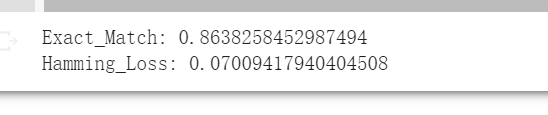

**Conclusions about the classifiers**
- rbf SVM
    - Exact_match = 0.980
    - Hamming_loss = 0.012
    - Exact match and hamming loss are both quite satisfying.
- l1 penalized SVM
    - Exact_match = 0.911
    - Hamming_loss = 0.540
    - Hamming loss is a little bit high, which means the performance is not as good.
- smote
    - Exact_match = 0.864
    - Hamming_loss = 0.070
    - Using SMOTE technic to augment the data source enlarges the training set. This makes the model's variance low, but may result in higher bias.

#### (v)  Classifier Chain method

#### (vi) multi-label classification evaluation metrics

## K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) k-means

In [42]:
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


In [157]:
# CH score
x = df.iloc[:,:-3].values
CH = []
for k in range(2,51):
    y_pred = KMeans(n_clusters=k, random_state=30).fit_predict(x)
    CH.append((calinski_harabasz_score(x, y_pred), k))
best_k = sorted(CH, reverse=True)[0][1]
max_ch = sorted(CH, reverse=True)[0][0]
print('best_k:', best_k)
print('max_ch_score:', max_ch)

best_k: 2
max_ch_score: 3680.7413494630905


In [158]:
# silhouette score
x = df.iloc[:,:-3].values
silhouette = []
for k in range(2,51):
    y_pred = KMeans(n_clusters=k, random_state=30).fit_predict(x)
    silhouette.append((silhouette_score(x, y_pred), k))
best_k = sorted(silhouette, reverse=True)[0][1]
max_sil = sorted(silhouette, reverse=True)[0][0]
print('best_k:', best_k)
print('max_silhouette_score:', max_sil)

best_k: 4
max_silhouette_score: 0.3787509343305295


### (b) cluster label

In [118]:
x = df.iloc[:,:-3].values
model = KMeans(n_clusters=4, random_state=30).fit(x)
cluster = pd.DataFrame(np.hstack((df.values, model.labels_.reshape(-1,1))))
cluster.columns = list(df.columns)+['group']
cluster

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,group
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.11868,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,3
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.05651,-0.035303,0.02014,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,3
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.02359,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,3
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,3
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.1727,0.266434,...,-0.048885,-0.053074,-0.08855,-0.031346,0.10861,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.06943,0.071001,0.021591,0.052449,-0.02186,-0.07986,Hylidae,Scinax,ScinaxRuber,3
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.40289,0.096628,-0.11646,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,3
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.07037,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,3
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,3


In [117]:
# clusters
cluster_dic = {}
for n in range(4):
    group_n_majorFamily = cluster[cluster.group == n].Family.value_counts().index[0]
    group_n_majorGenus = cluster[cluster.group == n].Genus.value_counts().index[0]
    group_n_majorSpecies = cluster[cluster.group == n].Species.value_counts().index[0]
    cluster_dic[n] = (group_n_majorFamily, group_n_majorGenus, group_n_majorSpecies)
cluster_dic

{0: ('Hylidae', 'Hypsiboas', 'HypsiboasCordobae'),
 1: ('Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'),
 2: ('Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'),
 3: ('Dendrobatidae', 'Ameerega', 'Ameeregatrivittata')}

### (c) average Hamming distance, Hamming score, Hamming loss

The Hamming distance between two vectors is simply the sum of corresponding elements that differ between the vectors

In [152]:
def hamming_loss_new(y_true, y_pred):
    hamm = 0
    for i in range(len(y_true)):
        tmp = 0
        for j in range(len(y_true[i])):
            if y_pred[i][0][j] != y_true[i][j]:
                tmp += 1
        hamm += tmp
    return hamm / (len(y_true) * 3)

def get_avg_hamming_distance(y_true, y_pred):
    hamm = 0
    for i in range(len(y_true)):
        tmp = 0
        for j in range(len(y_true[i])):
            if y_pred[i][0][j] != y_true[i][j]:
                tmp += 1
        hamm += tmp
    return hamm / len(y_true)

In [156]:
cluster['label'] = cluster.group.map(cluster_dic)
y_pred = cluster.label.values.reshape(-1,1)
orginal_label = np.hstack((cluster.Family.values.reshape(-1,1), cluster.Genus.values.reshape(-1,1), cluster.Species.values.reshape(-1,1)))
h_loss = hamming_loss_new(orginal_label, y_pred)
h_score = 1 - h_loss
h_distance = get_avg_hamming_distance(orginal_label, y_pred)
print('avg_hamming_distance:', h_distance)
print('hamming_loss:', h_loss)
print('hamming_score:', h_score)

avg_hamming_distance: 0.66726893676164
hamming_loss: 0.2224229789205467
hamming_score: 0.7775770210794533


In [159]:
# iterate for 50 times
hamming_distance_list = []
for i in range(50):
    # find best k using silhouette score
    x = df.iloc[:,:-3].values
    silhouette = []
    for k in range(2,51):
        y_pred = KMeans(n_clusters=k).fit_predict(x)
        silhouette.append((silhouette_score(x, y_pred), k))
    best_k = sorted(silhouette, reverse=True)[0][1]
    max_sil = sorted(silhouette, reverse=True)[0][0]
    #print('best_k:', best_k)
    #print('max_silhouette_score:', max_sil)

    # model with best k
    model = KMeans(n_clusters=best_k).fit(x)
    cluster = pd.DataFrame(np.hstack((df.values, model.labels_.reshape(-1,1))))
    cluster.columns = list(df.columns)+['group']

    # clusters
    cluster_dic = {}
    for n in range(4):
        group_n_majorFamily = cluster[cluster.group == n].Family.value_counts().index[0]
        group_n_majorGenus = cluster[cluster.group == n].Genus.value_counts().index[0]
        group_n_majorSpecies = cluster[cluster.group == n].Species.value_counts().index[0]
        cluster_dic[n] = (group_n_majorFamily, group_n_majorGenus, group_n_majorSpecies)

    # evaluate
    cluster['label'] = cluster.group.map(cluster_dic)
    y_pred = cluster.label.values.reshape(-1,1)
    orginal_label = np.hstack((cluster.Family.values.reshape(-1,1), cluster.Genus.values.reshape(-1,1), cluster.Species.values.reshape(-1,1)))
    h_loss = hamming_loss_new(orginal_label, y_pred)
    h_score = 1 - h_loss
    h_distance = get_avg_hamming_distance(orginal_label, y_pred)
    #print('avg_hamming_distance:', h_distance)
    #print('hamming_loss:', h_loss)
    #print('hamming_score:', h_score)
    hamming_distance_list.append(h_distance)

print('average of hamming distance:', np.mean(hamming_distance_list))
print('std of hamming distance:', np.std(hamming_distance_list))

average of hamming distance: 0.669036831132731
std of hamming distance: 0.010659484462815077


## ISLR 12.6.2

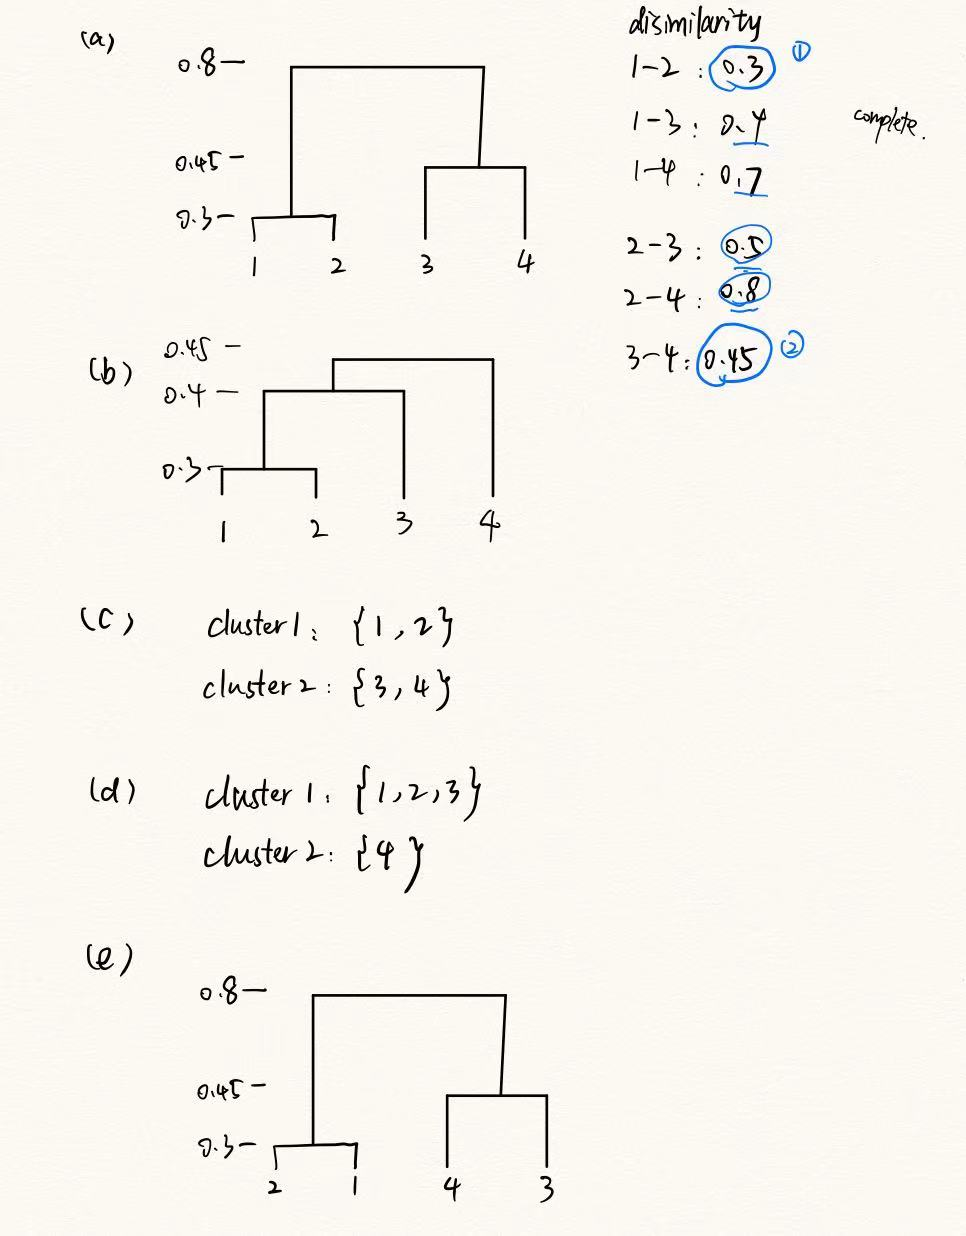